<a href="https://colab.research.google.com/github/kushh18/machinelearning/blob/master/Loan_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# **Now calculating Null Values**

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
total.head(20)

Credit_History       50
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode().values[0])
train['Married'] = train['Married'].fillna(train['Married'].mode().values[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mean())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train.tail()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,0.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1,3.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,1.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1,2.0
613,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0,0.0


In [ ]:
train.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Dependents           0
dtype: int64

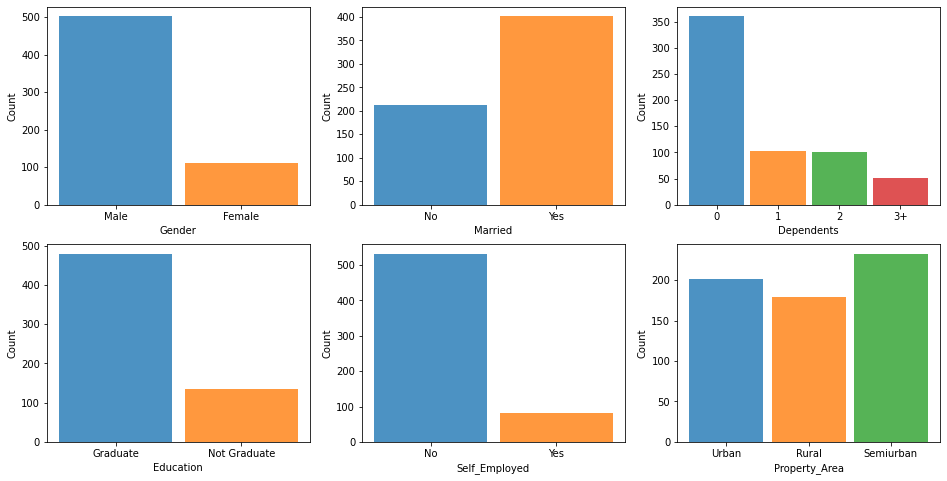

In [ ]:
fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8))            
sns.histplot(data=train, x="Gender",hue="Gender", shrink=.9, alpha=.8, legend=False, ax=axs[0,0],edgecolor='none')
sns.histplot(data=train, x="Married",hue="Married", shrink=.9, alpha=.8, legend=False, ax=axs[0,1],edgecolor='none')
sns.histplot(data=train, x="Dependents",hue="Dependents", shrink=.9, alpha=.8, legend=False, ax=axs[0,2],edgecolor='none')
sns.histplot(data=train, x="Education",hue="Education", shrink=.9, alpha=.8, legend=False, ax=axs[1,0],edgecolor='none')
sns.histplot(data=train, x="Self_Employed",hue="Self_Employed", shrink=.9, alpha=.8, legend=False, ax=axs[1,1],edgecolor='none')
sns.histplot(data=train, x="Property_Area",hue="Property_Area", shrink=.9, alpha=.8, legend=False, ax=axs[1,2],edgecolor='none')

Observations Made

1.More Males(1), are on loan than females(0)

2.Married customers are in loan than unmarried for obvious reasons

3.Graduates are more here probably applying for study loans

4.Less self-employed customers have applied for loan maybe they earn sufficient than the opposite

5.Customers from Semi-urban Areas are high due to high cost of living.

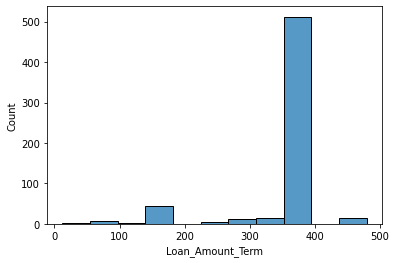

In [ ]:
sns.histplot(data=train, x = 'Loan_Amount_Term' )

# **Finding the columns which are correlated**

In [ ]:
corr=train.corr()
print(corr)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565620   
CoapplicantIncome        -0.116605           1.000000    0.187828   
LoanAmount                0.565620           0.187828    1.000000   
Loan_Amount_Term         -0.045242          -0.059675    0.038801   
Credit_History           -0.014477          -0.001665   -0.007738   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045242       -0.014477  
CoapplicantIncome         -0.059675       -0.001665  
LoanAmount                 0.038801       -0.007738  
Loan_Amount_Term           1.000000        0.001395  
Credit_History             0.001395        1.000000  


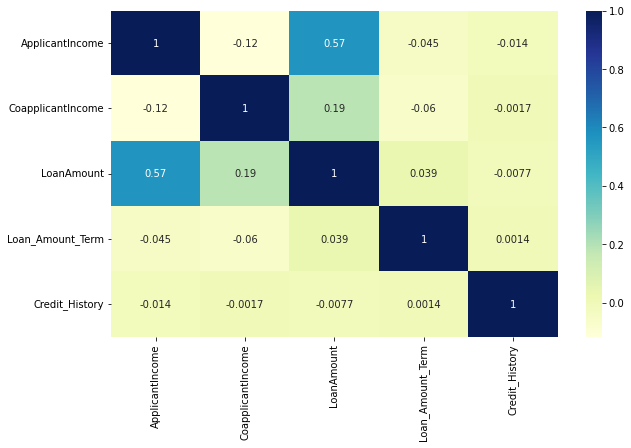

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.Married = le.fit_transform(train.Married)
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,0.0
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,1.0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1,0.0
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,0.0
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,0.0


In [ ]:
cols = ['Gender','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
train[cols] = train[cols].apply(LabelEncoder().fit_transform)
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,0.0
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,1.0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1,0.0
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,0.0
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,0.0


In [ ]:
train.tail()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y,0.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,Y,3.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y,1.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,Y,2.0
613,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,N,0.0


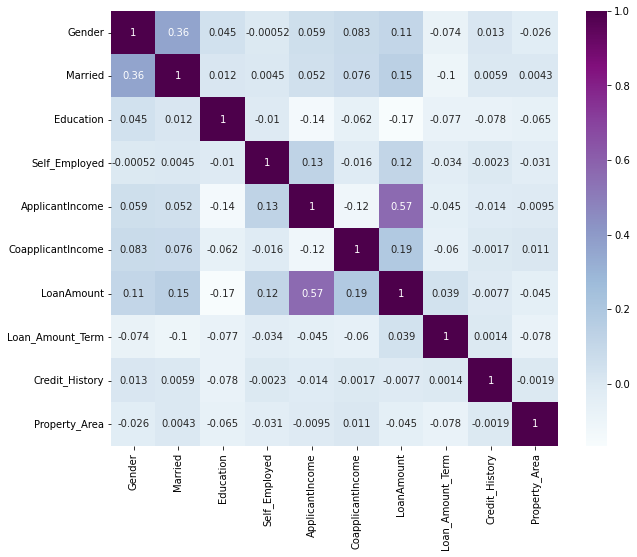

In [ ]:
corr = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap="BuPu")

# **Now we find which algo works best and train it**

In [ ]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,0.0
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,1.0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1,0.0
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,0.0
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,0.0


In [ ]:
code_numeric = {'3+': 3}


train = train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test = test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)




Dependents_ = pd.to_numeric(train.Dependents)
Dependents__ = pd.to_numeric(test.Dependents)
train.drop(['Dependents'], axis = 1, inplace = True)
test.drop(['Dependents'], axis = 1, inplace = True)
train = pd.concat([train, Dependents_], axis = 1)
test = pd.concat([test, Dependents__], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


y = train['Loan_Status']
X = train.drop('Loan_Status', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(type(X_test))
ypred = model.predict(X_test)

print(ypred)

<class 'pandas.core.frame.DataFrame'>
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = f1_score(y_test,ypred)
accuracy

0.8979591836734695

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
ypred_tree = tree.predict(X_test)

accuracy = f1_score(y_test,ypred_tree)
accuracy

0.7840909090909092

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
ypred_forest = forest.predict(X_test)

accuracy = f1_score(y_test, ypred_forest)
accuracy
     

0.8762886597938143

As seen above we can tell Logistic Regression works best for this dataset with an accuracy of 89%